In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.drop(['ID'], axis = 1, inplace = True)
test.drop(['ID'], axis = 1, inplace = True)
train.drop(['Var_1'], axis = 1, inplace = True)
test.drop(['Var_1'], axis = 1, inplace = True)

In [4]:
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


In [16]:
train.replace(to_replace= train['Gender'].unique(), value= range(len(train['Gender'].unique())), inplace= True)
train.replace(to_replace= train['Ever_Married'].unique(), value= range(len(train['Ever_Married'].unique())), inplace= True)
train.replace(to_replace= train['Graduated'].unique(), value= range(len(train['Graduated'].unique())), inplace= True)
train.replace(to_replace= train['Profession'].unique(), value= range(len(train['Profession'].unique())), inplace= True)
train.replace(to_replace= train['Spending_Score'].unique(), value= range(len(train['Spending_Score'].unique())), inplace= True)
train.replace(to_replace= train['Segmentation'].unique(), value= range(len(train['Segmentation'].unique())), inplace= True)

In [17]:
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0,0,22,0,0,1.000000,0,4.0,0
1,1,1,38,1,1,2.641663,1,3.0,1
2,1,1,67,1,1,1.000000,0,1.0,2
3,0,1,67,1,2,0.000000,2,2.0,2
4,1,1,40,1,3,2.641663,2,6.0,1
...,...,...,...,...,...,...,...,...,...
8062,0,1,41,1,4,0.000000,2,5.0,2
8064,0,0,35,0,8,3.000000,0,4.0,0
8065,1,0,33,1,0,1.000000,0,1.0,0
8066,1,0,27,1,0,1.000000,0,4.0,2


In [18]:
train['Work_Experience'] = train['Work_Experience'].fillna(value=train['Work_Experience'].mean())
train.isna().sum()
train.dropna(inplace=True)
test['Work_Experience'] = test['Work_Experience'].fillna(value=test['Work_Experience'].mean())
test.isna().sum()
test.dropna(inplace=True)

In [19]:
corr = train.corr()

<AxesSubplot:>

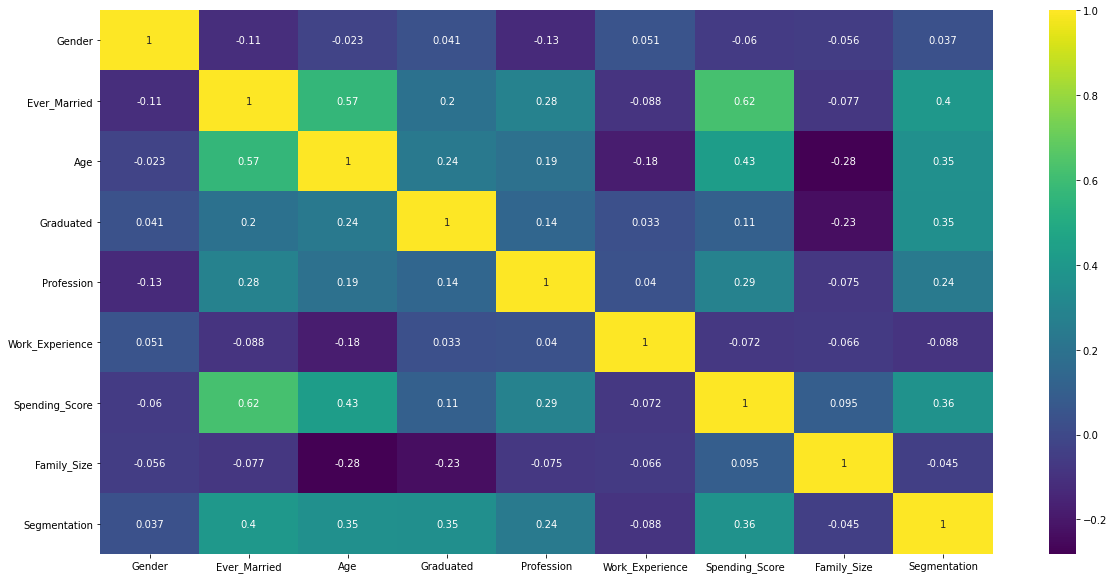

In [20]:
plt.figure(figsize = (20,10))
sns.heatmap(data = corr, cmap = 'viridis', annot = True)

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

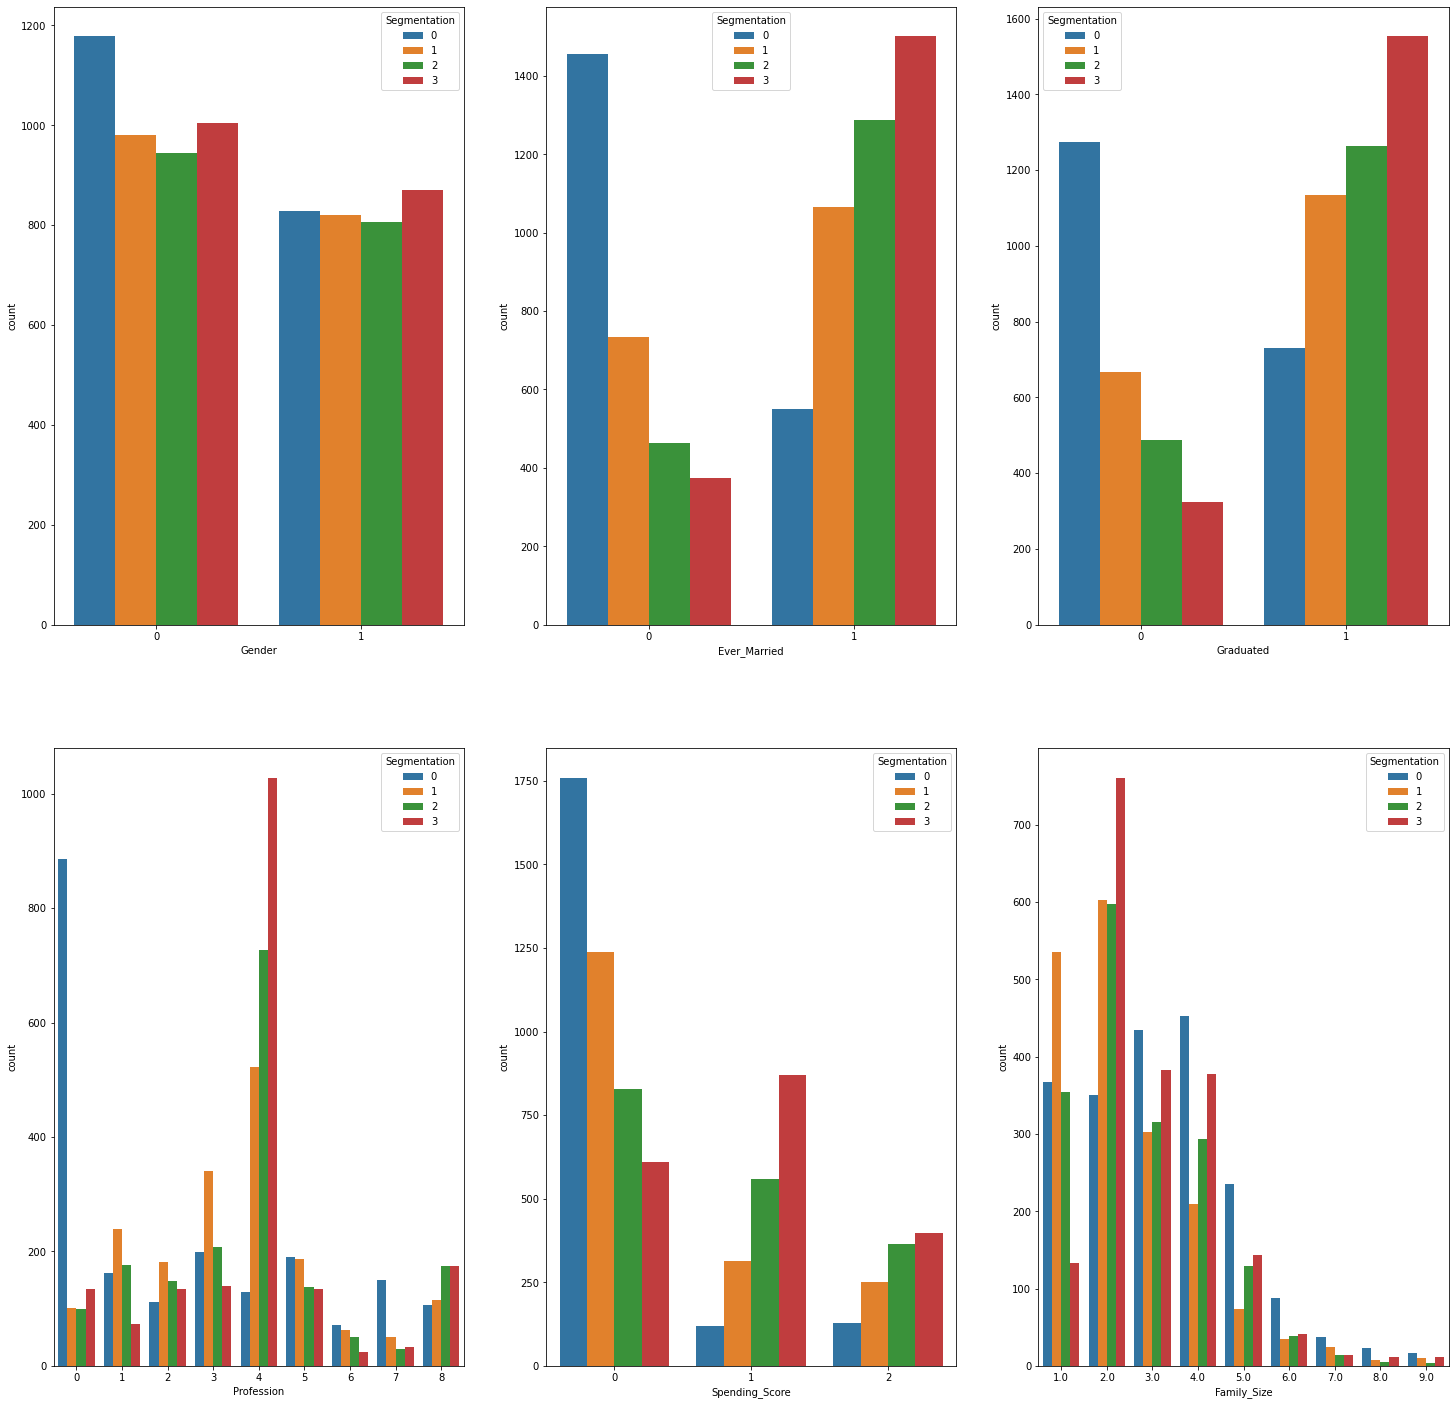

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (25, 25))
sns.countplot(ax = axes[0, 0], x = 'Gender', data = train, hue = 'Segmentation')
sns.countplot(ax = axes[0, 1], x = 'Ever_Married', data = train, hue = 'Segmentation')
#sns.countplot(ax = axes[0, 2], x = 'Age', data = train, hue = 'Segmentation')
sns.countplot(ax = axes[0, 2], x = 'Graduated', data = train, hue = 'Segmentation')
sns.countplot(ax = axes[1, 0], x = 'Profession', data = train, hue = 'Segmentation')
#sns.countplot(ax = axes[1, 1], x = 'Work_Experience', data = train, hue = 'Segmentation')
sns.countplot(ax = axes[1, 1], x = 'Spending_Score', data = train, hue = 'Segmentation')
sns.countplot(ax = axes[1, 2], x = 'Family_Size', data = train, hue = 'Segmentation')
#sns.countplot(ax = axes[2, 2], x = 'Var_1', data = train, hue = 'Segmentation')

In [30]:
train_new = train

In [31]:
params_dtc = {
    'dtc__max_depth': [3,5,8,10],
    'dtc__min_samples_leaf': [5,8,12,15,20],
    'dtc__criterion': ["gini", "entropy"]
}

n_estimators = [100, 500, 800]
max_depth = [2, 3, 5, 10]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3]
base_score=[0.25,0.5,0.75]

# Define the grid of hyperparameters to search
params_xgbc = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

param_rf = {"n_estimators": [10, 18, 22],
              "max_depth": [3, 5],
              "min_samples_split": [15, 20],
              "min_samples_leaf": [5, 10, 20],
              "max_leaf_nodes": [20, 40],
              "min_weight_fraction_leaf": [0.1]}

params_gboost = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }
params_logistic_reg = {
    'class_weight' : ['balanced', None], 
    'penalty' : ['l2','l1'],  
    'C' : [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 10, 100, 1000],
    'solver' : ['liblinear', 'saga'],
}

params_knn = dict(n_neighbors= list(range(1, 31)))

params_svm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [32]:
def model_eval(model, params):
    grid = GridSearchCV(estimator=model, param_grid=params, cv = 3, n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    predictions = grid.predict(X_test)
    print('Grid best score : ', grid.best_score_)
    report = classification_report(y_test, predictions)
    print('Classification Report : ', report)
    matrix = confusion_matrix(y_test, predictions)
    print('Confusion Matrix : ', matrix)

In [33]:
X = train_new.drop(['Segmentation'], axis = 1)
y = train_new['Segmentation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
estimators = [('OneHotEncoder', OneHotEncoder(drop='first', sparse=False)),('Scaler', StandardScaler(with_mean=False))]
model_pipe = Pipeline(steps=estimators)
X_train = model_pipe.fit_transform(X_train)
X_test = model_pipe.fit_transform(X_test)

In [34]:
model_gbc = GradientBoostingClassifier()
model_eval(model_gbc, params_gboost)
model_rfc = RandomForestClassifier()
model_eval(model_rfc, param_rf)
model_logic = LogisticRegression()
model_eval(model_logic, params_logistic_reg)
model_knn = KNeighborsClassifier()
model_eval(model_knn, params_knn)
model_svc = SVC()
model_eval(model_svc, params_svm)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 53.6min finished


{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.2}
Grid best score :  0.5172690763052209
Classification Report :                precision    recall  f1-score   support

           0       0.62      0.68      0.65       669
           1       0.42      0.45      0.43       583
           2       0.37      0.32      0.34       579
           3       0.54      0.52      0.53       623

    accuracy                           0.50      2454
   macro avg       0.49      0.49      0.49      2454
weighted avg       0.49      0.50      0.49      2454

Confusion Matrix :  [[454 138  46  31]
 [112 260 130  81]
 [ 79 148 184 168]
 [ 87  72 138 326]]
Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 201 out of 216 | elapsed:    5.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    5.3s finished


{'max_depth': 5, 'max_leaf_nodes': 40, 'min_samples_leaf': 20, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 18}
Grid best score :  0.4493975903614458
Classification Report :                precision    recall  f1-score   support

           0       0.48      0.85      0.62       669
           1       0.25      0.03      0.06       583
           2       0.00      0.00      0.00       579
           3       0.39      0.76      0.52       623

    accuracy                           0.43      2454
   macro avg       0.28      0.41      0.30      2454
weighted avg       0.29      0.43      0.31      2454

Confusion Matrix :  [[569  16   0  84]
 [291  19   0 273]
 [185  22   0 372]
 [132  19   0 472]]
Fitting 3 folds for each of 88 candidates, totalling 264 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:  1.6min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Grid best score :  0.5160642570281125
Classification Report :                precision    recall  f1-score   support

           0       0.62      0.67      0.64       669
           1       0.40      0.43      0.42       583
           2       0.38      0.25      0.30       579
           3       0.49      0.57      0.53       623

    accuracy                           0.49      2454
   macro avg       0.47      0.48      0.47      2454
weighted avg       0.48      0.49      0.48      2454

Confusion Matrix :  [[448 134  38  49]
 [113 252  97 121]
 [ 78 156 143 202]
 [ 82  84 102 355]]
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   38.5s finished


{'n_neighbors': 6}
Grid best score :  0.436144578313253
Classification Report :                precision    recall  f1-score   support

           0       0.54      0.62      0.58       669
           1       0.33      0.35      0.34       583
           2       0.32      0.27      0.30       579
           3       0.45      0.42      0.43       623

    accuracy                           0.42      2454
   macro avg       0.41      0.42      0.41      2454
weighted avg       0.42      0.42      0.42      2454

Confusion Matrix :  [[418 125  68  58]
 [159 202 118 104]
 [105 156 157 161]
 [ 99 121 142 261]]
Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.0min finished


{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Grid best score :  0.514859437751004
Classification Report :                precision    recall  f1-score   support

           0       0.62      0.69      0.65       669
           1       0.43      0.49      0.46       583
           2       0.40      0.25      0.31       579
           3       0.51      0.56      0.54       623

    accuracy                           0.51      2454
   macro avg       0.49      0.50      0.49      2454
weighted avg       0.50      0.51      0.50      2454

Confusion Matrix :  [[459 140  34  36]
 [110 284  90  99]
 [ 80 155 147 197]
 [ 90  86  97 350]]
